In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from scipy.stats import spearmanr, pearsonr, zscore, rankdata
import matplotlib.pyplot as plt

In [15]:
def read_csv(path):
    return pd.read_csv(path, sep=",", index_col=0)

In [16]:
F = read_csv("../../img/dwts-year.csv")

In [17]:
F

,tot_frq,doc_frq,frq_2000,frq_2001,frq_2002,frq_2003,frq_2004,frq_2005,frq_2006,frq_2007,...,fpm_2013,fpm_2014,fpm_2015,fpm_2016,fpm_2017,fpm_2018,fpm_2019,fpm_2020,fpm_2021,fpm_2022
N1_kulturberikare,6133,22,45,28,10,0,36,24,76,307,...,1.056925e-06,4.380426e-07,3.114593e-07,4.511033e-07,3.243802e-07,5.472025e-07,5.359361e-07,2.723959e-07,3.105861e-07,1.989073e-07
V1_berika,20936,23,43,22,30,23,77,88,276,703,...,3.125800e-06,2.491367e-06,2.662544e-06,3.207582e-06,2.464151e-06,2.335181e-06,2.940848e-06,2.290850e-06,1.567489e-06,1.301185e-06
N1_berikare,4317,18,21,0,0,0,0,0,20,213,...,6.206624e-07,4.254067e-07,4.671889e-07,3.632569e-07,3.556800e-07,3.220163e-07,3.863093e-07,2.397084e-07,8.007298e-08,5.469951e-08
N1_globalist,31156,18,0,0,0,0,0,24,43,32,...,1.996914e-06,1.836409e-06,1.732492e-06,4.936020e-06,7.972923e-06,1.066032e-05,1.125466e-05,1.015492e-05,8.094651e-06,9.162996e-06
V1_kulturberika,2445,18,0,0,0,0,0,12,20,149,...,4.609992e-07,2.442930e-07,2.790156e-07,2.587908e-07,1.707264e-07,1.666378e-07,1.713907e-07,1.825053e-07,1.140433e-07,5.967219e-08
N1_återvandring,12999,17,0,0,0,0,0,0,30,66,...,4.992284e-07,4.001350e-07,3.222738e-07,4.985878e-07,5.207155e-07,8.876840e-06,4.635712e-06,4.042356e-06,4.501072e-06,3.817363e-06
V1_återvandra,1449,17,0,0,0,0,0,0,10,26,...,1.439217e-07,9.898077e-08,6.488735e-08,4.985878e-08,7.682688e-08,6.980772e-07,3.917503e-07,3.840783e-07,5.071289e-07,3.845541e-07
A1_globalistisk,5460,15,0,0,0,0,0,0,0,0,...,4.699943e-07,5.222815e-07,3.547175e-07,7.265137e-07,1.377193e-06,1.657370e-06,2.187272e-06,1.909496e-06,1.366094e-06,1.175211e-06
V1_hjälpa_på_plats,1150,14,0,0,0,0,0,0,0,0,...,1.349266e-07,3.853932e-07,6.618510e-07,1.851898e-07,2.020262e-07,1.643859e-07,1.333039e-07,1.743334e-07,1.431608e-07,6.132975e-08
N1_förortsgäng,227,11,0,0,0,0,0,0,0,0,...,3.148287e-08,5.264935e-08,3.893241e-08,2.849073e-08,3.983616e-08,5.404469e-08,7.889415e-08,2.996355e-08,5.095553e-08,6.630243e-08


In [19]:
years = sorted([int(col.replace("frq_", "")) for col in F.columns if col.startswith("frq")])

In [34]:
lines = {}
for word in F.index:
    print(word)
    lines[word] = F.loc[word][[col for col in F.columns if col.startswith("fpm")]]

N1_kulturberikare
V1_berika
N1_berikare
N1_globalist
V1_kulturberika
N1_återvandring
V1_återvandra
A1_globalistisk
V1_hjälpa_på_plats
N1_förortsgäng
P1_självständig_utrikespolitik
N2_återvandrare


In [50]:
# plt.figure(figsize=(12, 12), dpi=80)

# for word in lines.keys():
#     plt.plot(years, zscore(lines[word]), label=word)
# plt.legend(loc="upper left")
# plt.show()

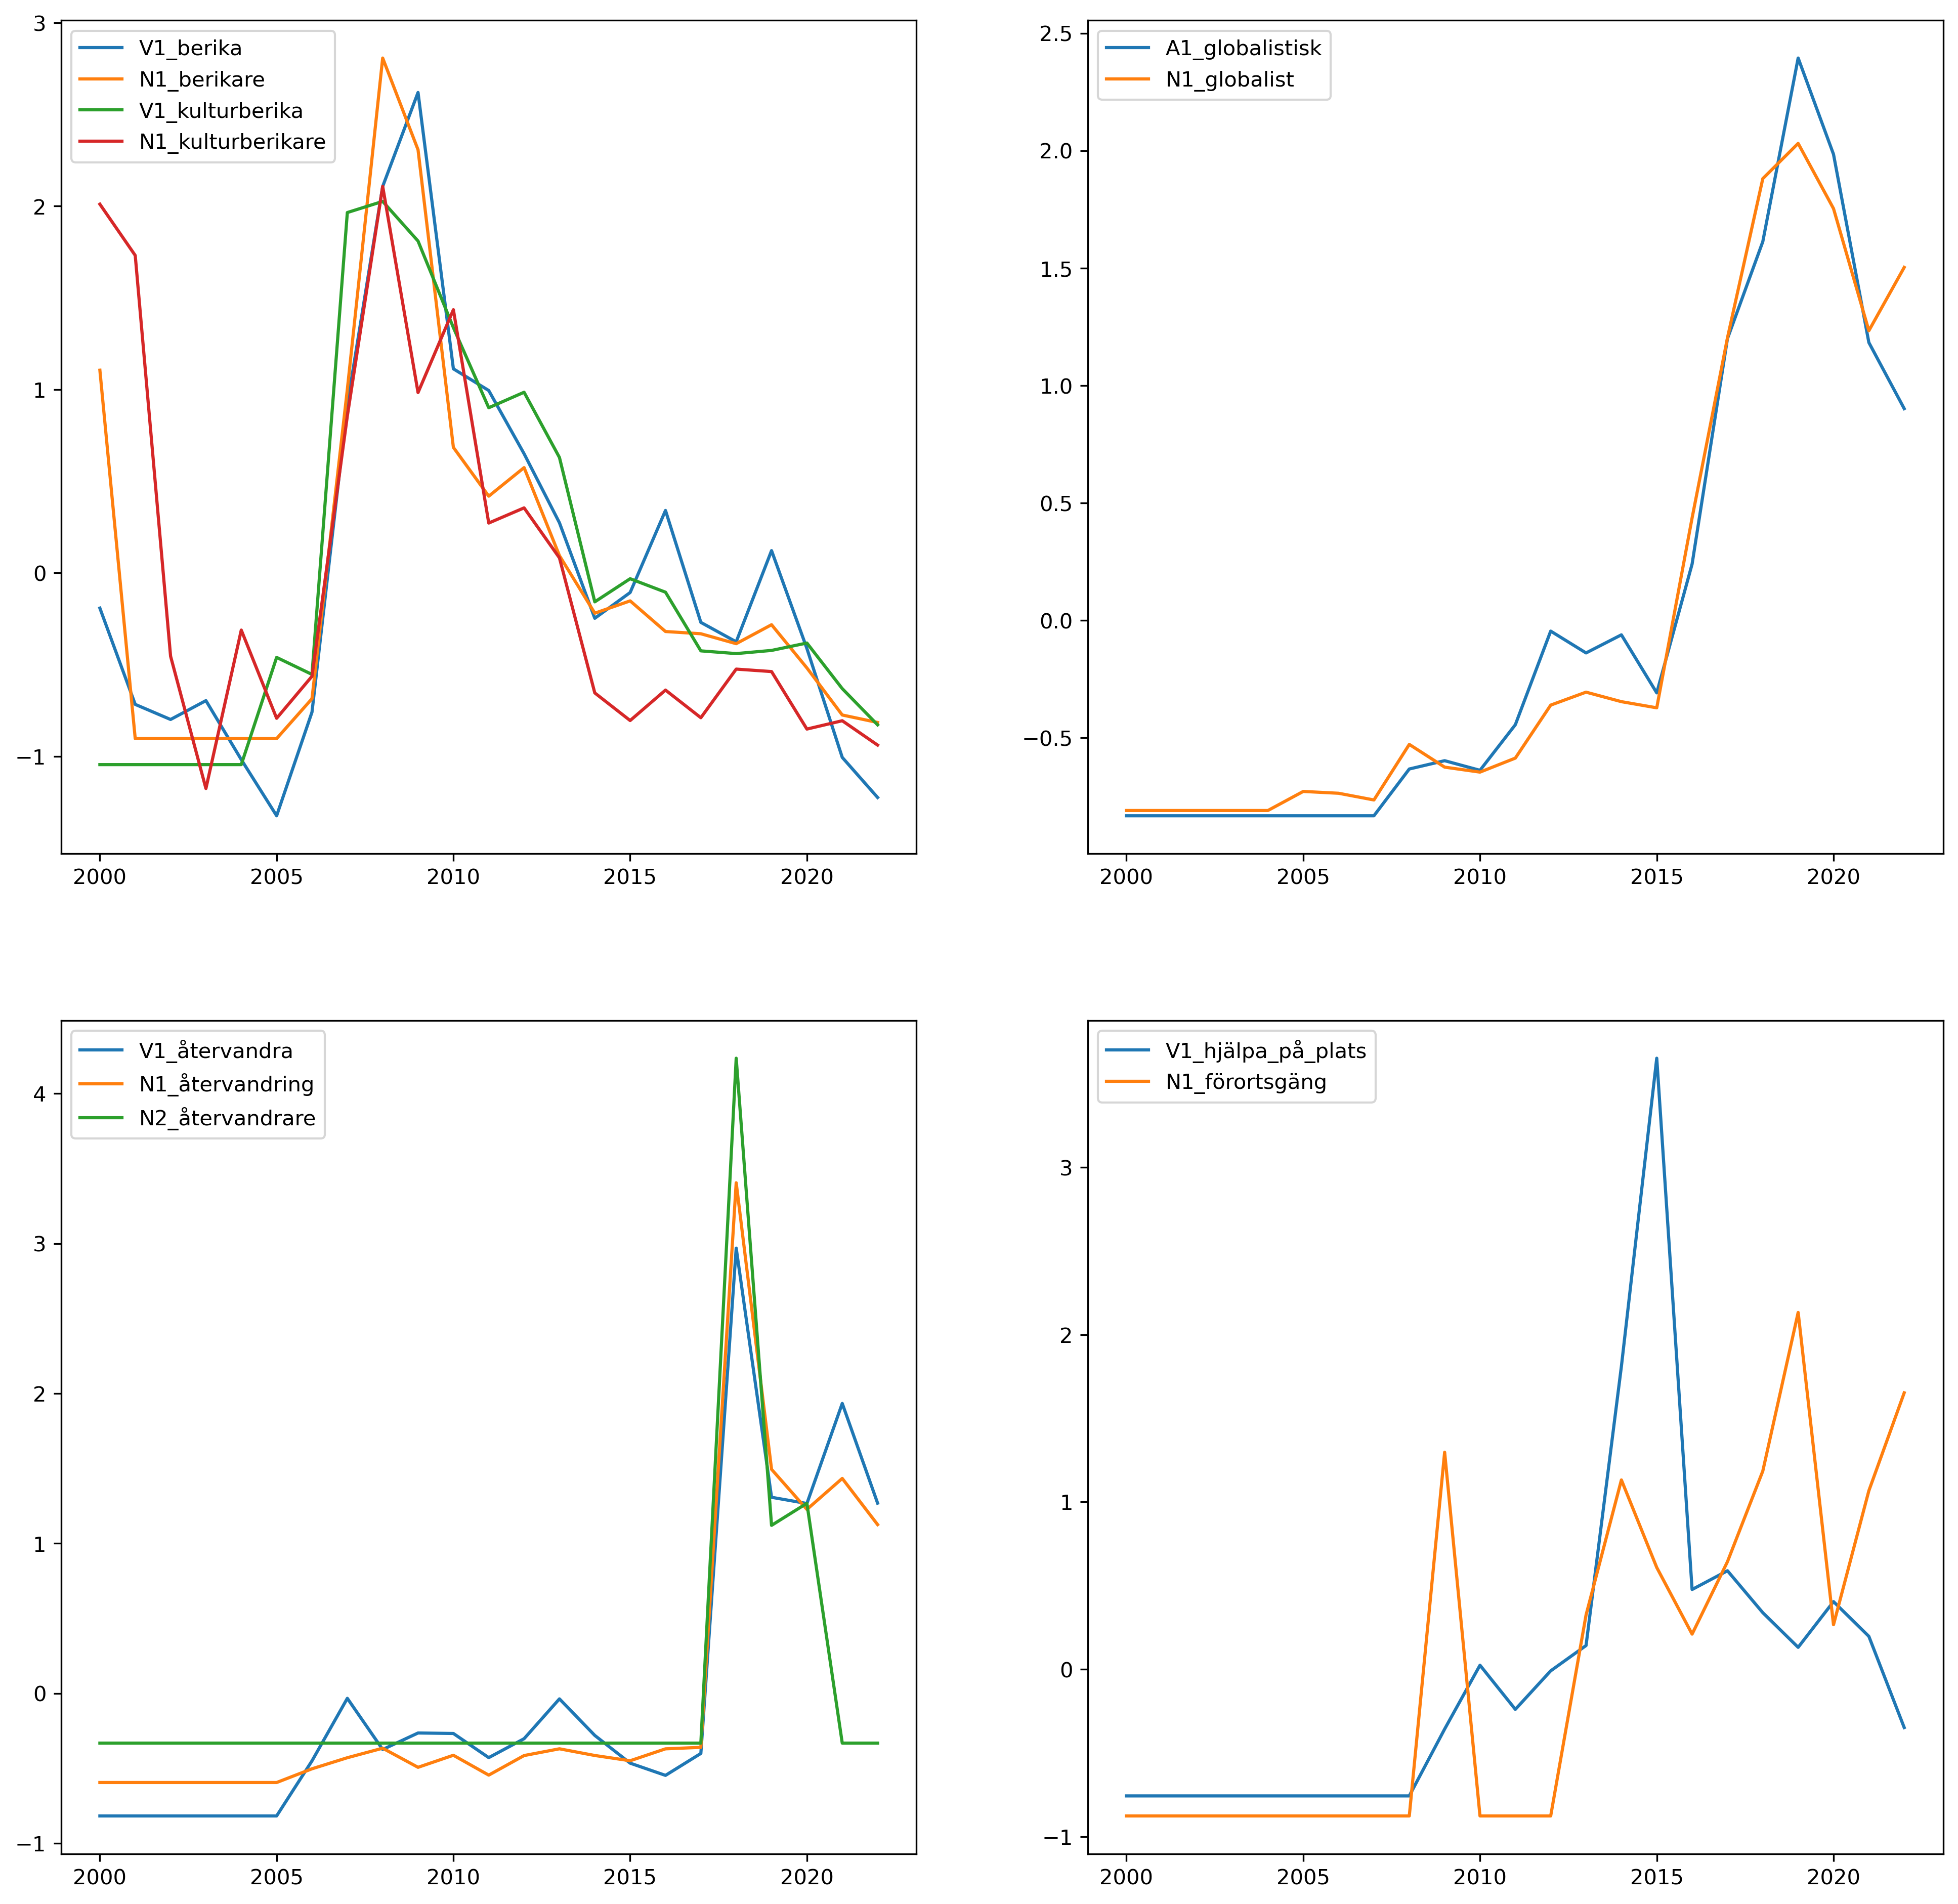

In [52]:
plt.figure(figsize=(16, 16), dpi=300)

plt.subplot(221)
for word in ["V1_berika", "N1_berikare", "V1_kulturberika", "N1_kulturberikare"]:
    plt.plot(years, zscore(lines[word]), label=word)
plt.legend(loc="upper left")

plt.subplot(222)
for word in ["A1_globalistisk", "N1_globalist"]:
    plt.plot(years, zscore(lines[word]), label=word)
plt.legend(loc="upper left")

plt.subplot(223)
for word in ["V1_återvandra", "N1_återvandring", "N2_återvandrare"]:
    plt.plot(years, zscore(lines[word]), label=word)
plt.legend(loc="upper left")

plt.subplot(224)
for word in ["V1_hjälpa_på_plats", "N1_förortsgäng"]:
    plt.plot(years, zscore(lines[word]), label=word)
plt.legend(loc="upper left")

plt.show()

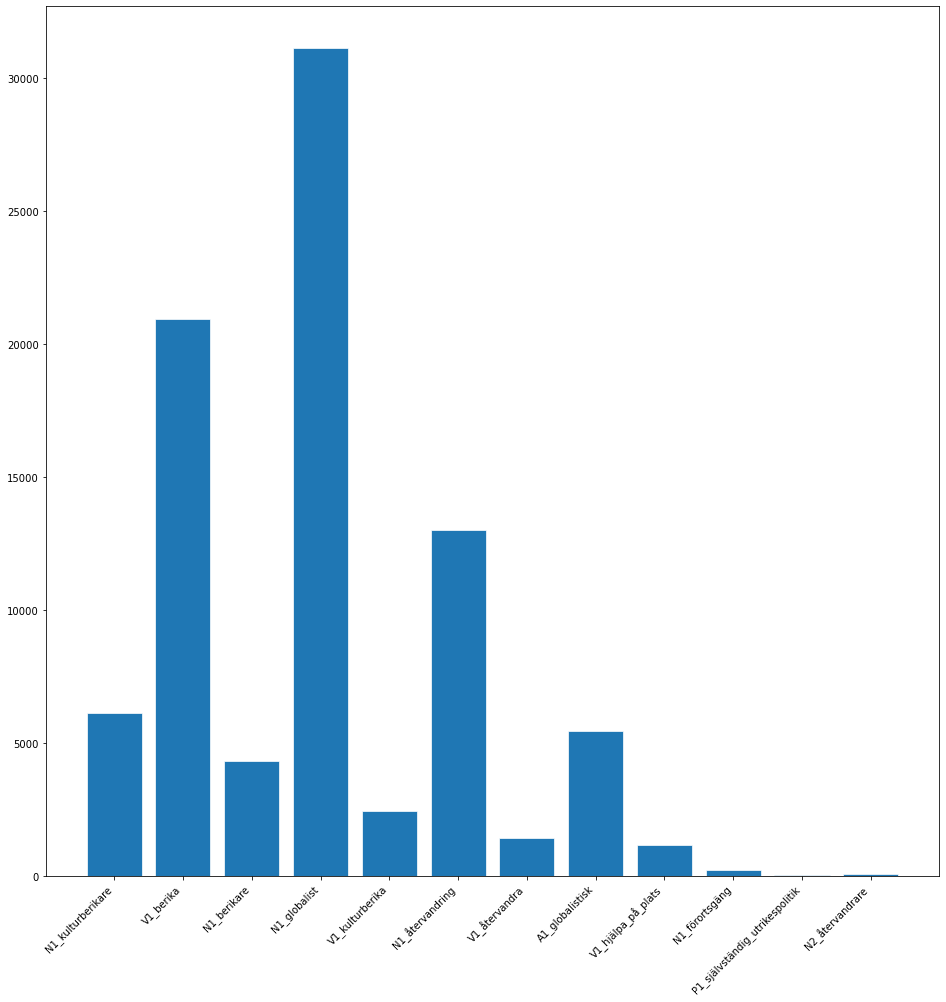

In [65]:
# plot
F_bar = F.sort_values(""tot_frq"")
fig, ax = plt.subplots(figsize=(16, 16))

ax.bar(F.sort_values()index, F["tot_frq"], edgecolor="white", linewidth=0.7)
plt.xticks(rotation=45, ha='right')
# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()